# 🧪 U.S._Chronic_Disease_Indicators

In [8]:
#🔧 Core Libraries
import pandas as pd
import numpy as np
# 📊 Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# 🧪 MODEL TRAINING + PREPROCESSING
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
# 🌳 MACHINE LEARNING MODELS
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# 📏 MODEL EVALUATION METRICS
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 📥 Load the Dataset

In [9]:
df = pd.read_csv("U.S._Chronic_Disease_Indicators.csv")
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2020,2020,US,United States,BRFSS,Health Status,Recent activity limitation among adults,NaN,Number,Age-adjusted Mean,...,HEA,HEA04,NaN,AGEADJMEAN,SEX,SEXF,NaN,NaN,NaN,NaN
1,2015,2019,AR,Arkansas,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Number,Number,...,CAN,CAN07,NaN,NMBR,SEX,SEXM,NaN,NaN,NaN,NaN
2,2015,2019,CA,California,US Cancer DVT,Cancer,"Cervical cancer mortality among all females, u...",NaN,Number,Number,...,CAN,CAN03,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2015,2019,CO,Colorado,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Number,Number,...,CAN,CAN07,NaN,NMBR,RACE,HIS,NaN,NaN,NaN,NaN
4,2015,2019,GA,Georgia,US Cancer DVT,Cancer,"Prostate cancer mortality among all males, und...",NaN,Number,Number,...,CAN,CAN05,NaN,NMBR,RACE,WHT,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309215 entries, 0 to 309214
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  309215 non-null  int64  
 1   YearEnd                    309215 non-null  int64  
 2   LocationAbbr               309215 non-null  object 
 3   LocationDesc               309215 non-null  object 
 4   DataSource                 309215 non-null  object 
 5   Topic                      309215 non-null  object 
 6   Question                   309215 non-null  object 
 7   Response                   0 non-null       float64
 8   DataValueUnit              309215 non-null  object 
 9   DataValueType              309215 non-null  object 
 10  DataValue                  209196 non-null  float64
 11  DataValueAlt               209196 non-null  float64
 12  DataValueFootnoteSymbol    101716 non-null  object 
 13  DataValueFootnote          10

In [11]:
df.describe(include='all')

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
count,309215.000000,309215.000000,309215,309215,309215,309215,309215,0.0,309215,309215,...,309215,309215,0.0,309215,309215,309215,0.0,0.0,0.0,0.0
unique,NaN,NaN,55,55,14,19,109,NaN,8,12,...,19,109,NaN,12,5,26,NaN,NaN,NaN,NaN
top,NaN,NaN,US,United States,BRFSS,Cardiovascular Disease,Binge drinking frequency among adults who bing...,NaN,%,Crude Prevalence,...,CVD,ALC04,NaN,CRDPREV,RACE,OVR,NaN,NaN,NaN,NaN
freq,NaN,NaN,5763,5763,195594,30709,5720,NaN,203382,128198,...,30709,5720,NaN,128198,188664,29201,NaN,NaN,NaN,NaN
mean,2020.012195,2020.288540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.530835,1.068591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2015.000000,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2019.000000,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2020.000000,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2021.000000,2021.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.isnull().sum().sort_values(ascending=False)

StratificationCategoryID3    309215
Response                     309215
ResponseID                   309215
StratificationCategory2      309215
StratificationID2            309215
StratificationCategoryID2    309215
Stratification3              309215
StratificationCategory3      309215
Stratification2              309215
StratificationID3            309215
DataValueFootnoteSymbol      207499
DataValueFootnote            207499
LowConfidenceLimit           120330
HighConfidenceLimit          120325
DataValueAlt                 100019
DataValue                    100019
Geolocation                    5763
YearStart                         0
YearEnd                           0
Stratification1                   0
DataSource                        0
LocationDesc                      0
Topic                             0
Question                          0
DataValueUnit                     0
DataValueType                     0
LocationAbbr                      0
StratificationCategory1     

## 🧹 Data Cleaning 

In [13]:
threshold = 0.6  # 60%
missing_percent = df.isnull().mean()

cols_to_drop = missing_percent[missing_percent > threshold].index
df.drop(columns=cols_to_drop, inplace=True)

In [14]:
df['DataValue'] = (
    df['DataValue']
    .astype(str)
    .str.replace(",", "", regex=False)     
    .str.replace("%", "", regex=False)     
    .str.replace("<", "", regex=False)    
    .str.replace(">", "", regex=False)    
    .str.strip()                          
    .replace({"nan": None, "": None})     
)
df['DataValue'] = pd.to_numeric(df['DataValue'], errors='coerce')

In [15]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include='object').columns

# numeric impute
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# categorical impute
df[cat_cols] = df[cat_cols].fillna("Unknown")

In [16]:
df.isnull().sum()  

YearStart                    0
YearEnd                      0
LocationAbbr                 0
LocationDesc                 0
DataSource                   0
Topic                        0
Question                     0
DataValueUnit                0
DataValueType                0
DataValue                    0
DataValueAlt                 0
LowConfidenceLimit           0
HighConfidenceLimit          0
StratificationCategory1      0
Stratification1              0
Geolocation                  0
LocationID                   0
TopicID                      0
QuestionID                   0
DataValueTypeID              0
StratificationCategoryID1    0
StratificationID1            0
dtype: int64

## 📌 Data Preprocessing: Target Creation, Encoding & Scaling

In [17]:
median_val = df['DataValue'].median()
df['HighValue'] = (df['DataValue'] > median_val).astype(int)
df['HighValue'].value_counts()

HighValue
0    204955
1    104260
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
le = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [19]:
X = df_encoded.drop(columns=['HighValue'])
y = df_encoded['HighValue']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 📊 Visualization of Target Variable Distribution

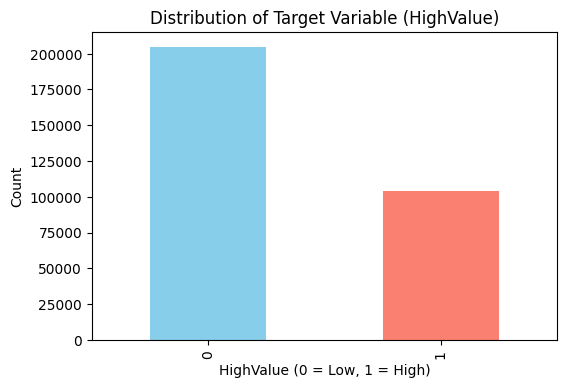

In [21]:
plt.figure(figsize=(6,4))
df_encoded['HighValue'].value_counts().plot(
    kind='bar', 
    color=['skyblue', 'salmon']  )
plt.title("Distribution of Target Variable (HighValue)")
plt.xlabel("HighValue (0 = Low, 1 = High)")
plt.ylabel("Count")
plt.show()

## 🦠 Top 10 Most Common Diseases in the Dataset

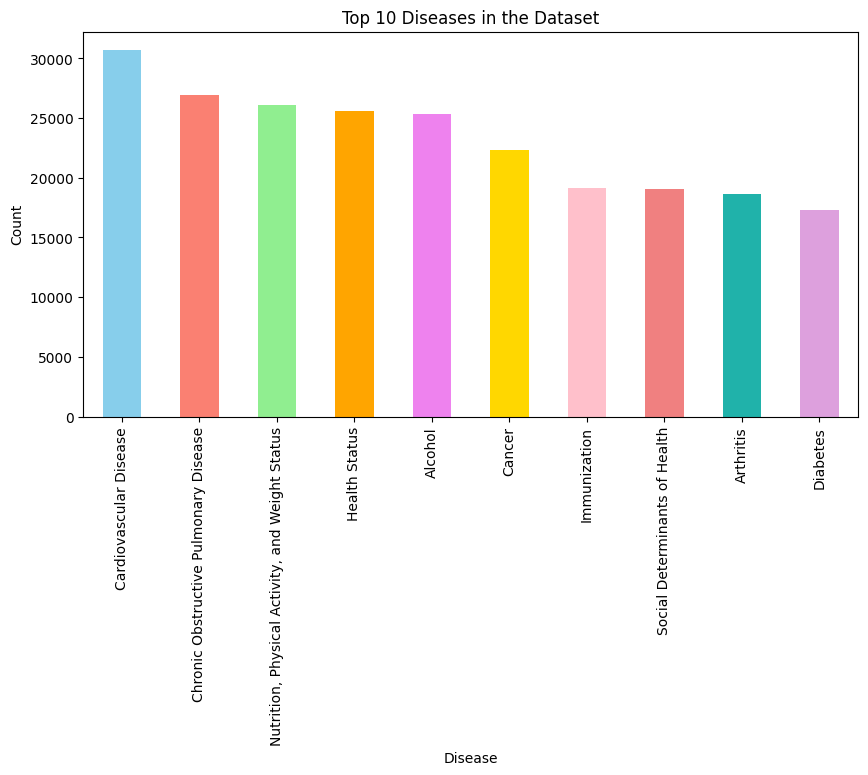

In [22]:
plt.figure(figsize=(10,5))
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'violet', 'gold', 'pink', 'lightcoral', 'lightseagreen', 'plum']
df['Topic'].value_counts().head(10).plot(
    kind='bar', 
    color=colors)
plt.title("Top 10 Diseases in the Dataset")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.show()

## 🌿 K-Nearest Neighbors (KNN) Model: Training, Evaluation 

In [54]:
# Train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [72]:
# Predict
y_pred_knn = knn_model.predict(X_test)
print(y_pred_knn)
print("\nK-Nearest Neighbors Classification Report:\n")
print(classification_report(y_test, y_pred_knn))

[0 0 0 ... 0 1 0]

K-Nearest Neighbors Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     40991
           1       0.93      0.84      0.88     20852

    accuracy                           0.92     61843
   macro avg       0.92      0.90      0.91     61843
weighted avg       0.92      0.92      0.92     61843



In [57]:
# Accuracy
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.3f}")

KNN Accuracy: 0.922


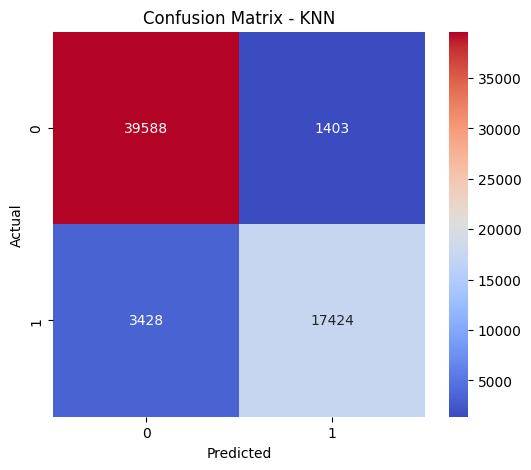

In [37]:
# Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), 
            annot=True, 
            cmap='coolwarm',   
            fmt='g')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 🟢 Logistic Regression: Training, Confusion Matrix & ROC Curve

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
model=LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [73]:
# Predict on test set
y_pred = model.predict(X_test)
print(y_pred)
print("\nLogistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred))

[0 0 0 ... 0 1 0]

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     40991
           1       0.99      0.95      0.97     20852

    accuracy                           0.98     61843
   macro avg       0.98      0.97      0.98     61843
weighted avg       0.98      0.98      0.98     61843



<Figure size 500x500 with 0 Axes>

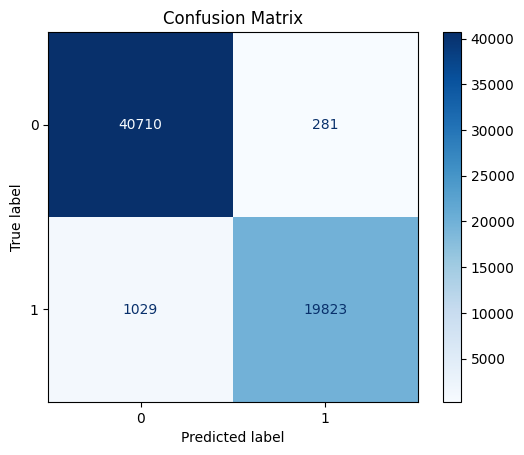

In [42]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
plt.figure(figsize=(5,5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

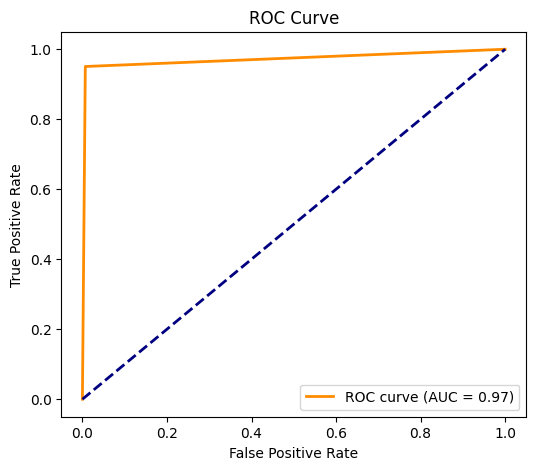

In [43]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## 🌳 Decision Tree Classifier: Training, Evaluation & Visualization

In [50]:
# Train the Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(max_depth=None, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [67]:
# Make predictions
y_pred_dt = dt.predict(X_test)
print(y_pred_dt)
print("\nDecision Tree Classifier classification report:\n")
print(classification_report(y_test,y_pred_dt))

[0 0 0 ... 0 1 0]

Decision Tree Classifier classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40991
           1       1.00      1.00      1.00     20852

    accuracy                           1.00     61843
   macro avg       1.00      1.00      1.00     61843
weighted avg       1.00      1.00      1.00     61843



In [68]:
# Accuracy
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_dt):.3f}")

KNN Accuracy: 1.000


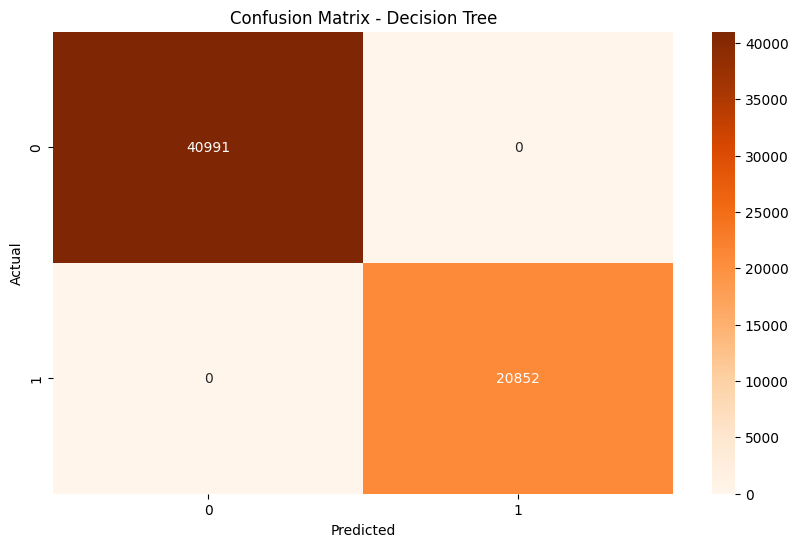

In [53]:
# Confusion Matrix Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap='Oranges', fmt='g')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

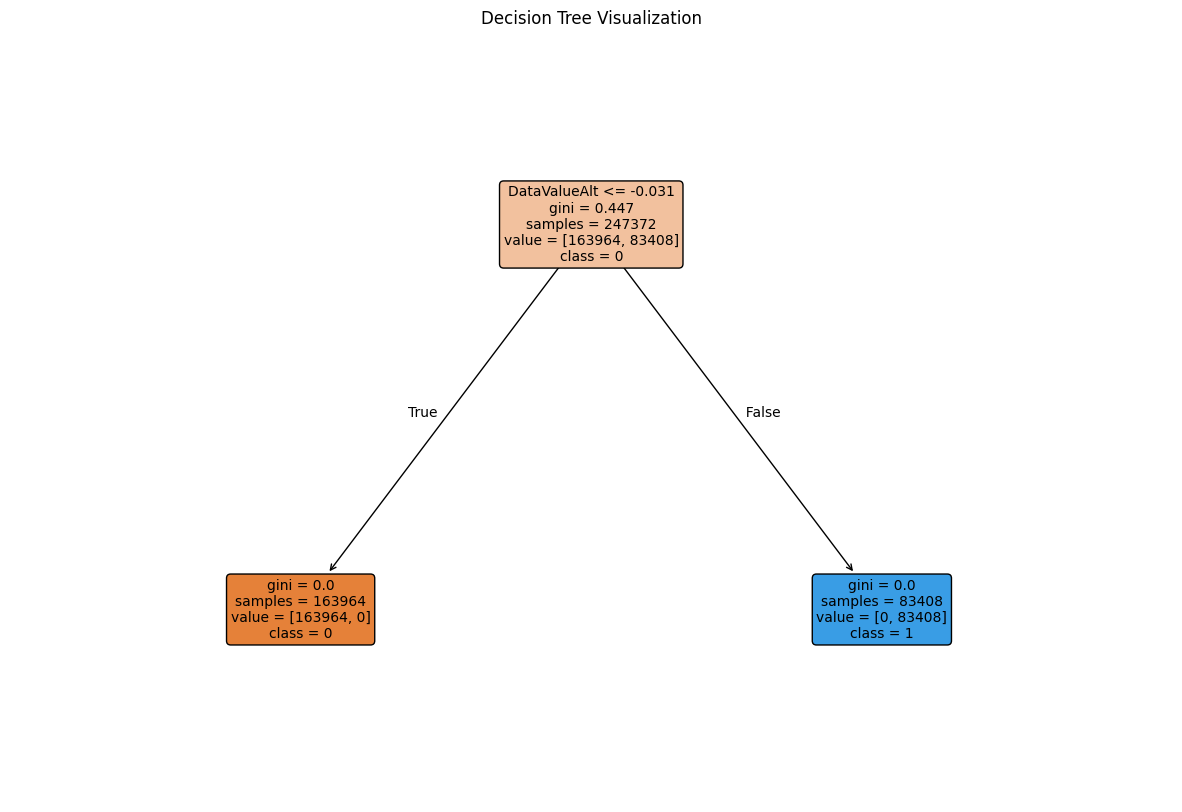

In [52]:
# Decision Tree Visualization
plt.figure(figsize=(15,10))
plot_tree(dt_model,
          filled=True,
          feature_names=X.columns,                 
          class_names=[str(c) for c in dt_model.classes_],  
          rounded=True,
          fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()


## 🌲 Random Forest Classifier: Training, Evaluation, ROC Curve & Feature Importance

In [48]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [70]:
# Predict
y_pred_rf = rf_model.predict(X_test)
print(y_pred_rf)
print("\nRandom Forest Classifier classification report:\n")
print(classification_report(y_test,y_pred_rf))

[0 0 0 ... 0 1 0]

Random Forest Classifier classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40991
           1       1.00      1.00      1.00     20852

    accuracy                           1.00     61843
   macro avg       1.00      1.00      1.00     61843
weighted avg       1.00      1.00      1.00     61843



In [30]:
# Accuracy
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")

Random Forest Accuracy: 1.000


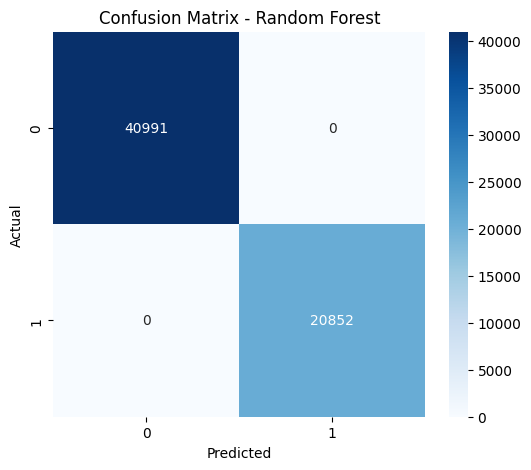

In [31]:
# Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

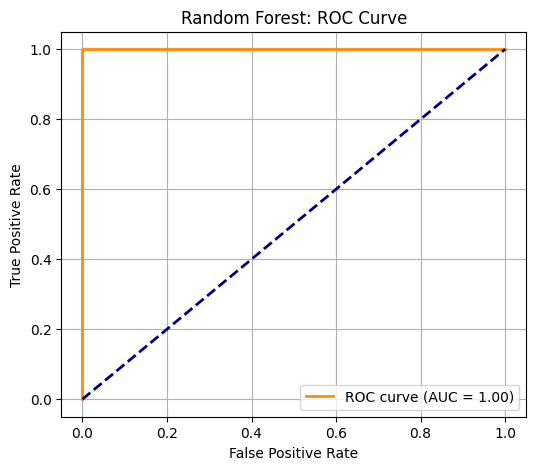

In [32]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest: ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

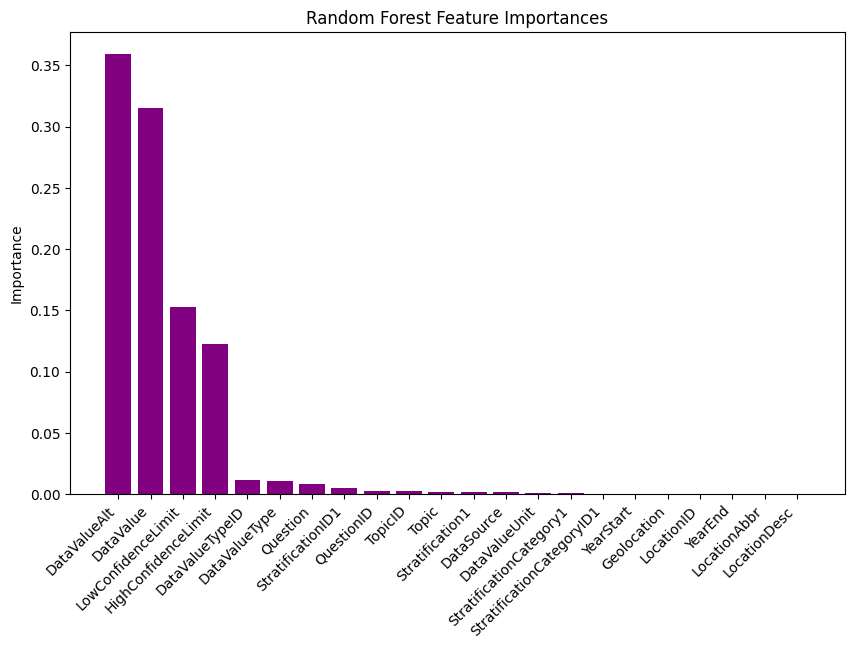

In [55]:
# Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  # sort descending
plt.figure(figsize=(10,6))
plt.title("Random Forest Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="Purple", align="center")
plt.xticks(range(X_train.shape[1]), [X.columns[i] for i in indices], rotation=45, ha='right')
plt.ylabel("Importance")
plt.show()